<a href="https://colab.research.google.com/github/worklifesg/Python-for-Computer-Vision-with-OpenCV-and-Deep-Learning/blob/main/3.%20Image%20Processing/7_ImageProcessing_Histograms_Equalization.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#### Image Processing (Histograms Equalization)

<b> General Histogram: </b> Visual representation of distribution of a continouous feature. Display as general trend of the frequency.

<b> For images: </b> 

- Display the frequency of values for colors.
- As each of the channel has values between 0-255, so we can plot 3 histograms on top of each other to see how much of each channel there is.



In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

%matplotlib inline

In [2]:
#Original form for OpenCV
horse = cv2.imread('horse.jpg')
rainbow = cv2.imread('rainbow.jpg')
bricks = cv2.imread('bricks.jpg')
#Converted to RGB for show
horse_c = cv2.cvtColor(horse,cv2.COLOR_BGR2RGB)
rainbow_c = cv2.cvtColor(rainbow,cv2.COLOR_BGR2RGB)
bricks_c = cv2.cvtColor(bricks,cv2.COLOR_BGR2RGB)

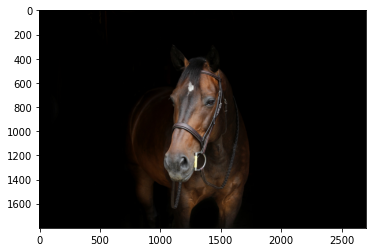

In [3]:
plt.imshow(horse_c)

So in this above image we have a lot of black (dark mode) which means that we might have a lot of spikes around 0 in the histogram 

In [4]:
#Histogram
#Open CV BGR - 0,1,2

hist_values_bricks = cv2.calcHist([bricks],channels=[0],mask=None, #as bricks are blue in color
             histSize=[256],ranges=[0,256]) #256 as n-1 beacuse the size is from 0 to n-1
hist_values_bricks.shape

(256, 1)

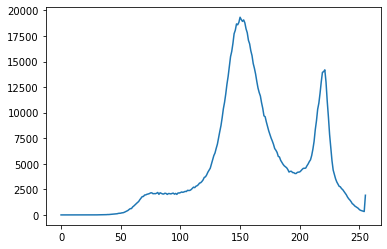

In [5]:
plt.plot(hist_values_bricks)

We see here that we have a <b> peak around 150 and 225 for blue </b>

In [6]:
hist_values_horse = cv2.calcHist([horse],channels=[0],mask=None, #as bricks are blue in color
             histSize=[256],ranges=[0,256]) #256 as n-1 beacuse the size is from 0 to n-1
hist_values_horse.shape

(256, 1)

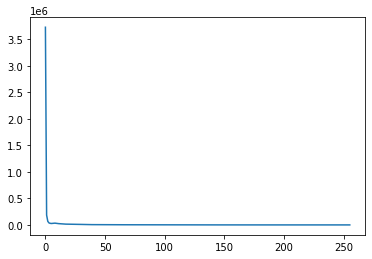

In [7]:
plt.plot(hist_values_horse)

So we see here for dark horse iamge, for blue channel most of the color pixel is zero with peak at 0 pixel showing it is black in most of the image.

Text(0.5, 1.0, 'Histogram for Blue bricks')

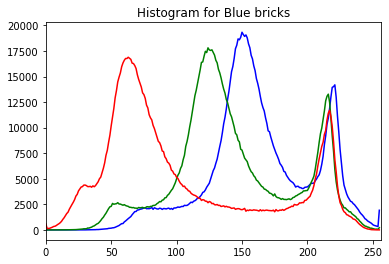

In [8]:
# to check all color channels for bricks image
img = bricks
color = ('b','g','r')

#function to plot all color channels
for i,col in enumerate(color):
  histr = cv2.calcHist([img],[i],None,[256],[0,256])
  plt.plot(histr,color=col)
  plt.xlim([0,256])

plt.title('Histogram for Blue bricks')

 - So we don't have a lot of contribution from red as compare to green and blue

Text(0.5, 1.0, 'Histogram for Dark Horse')

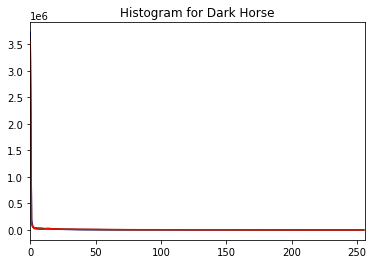

In [9]:
# to check all color channels for bricks image
img = horse
color = ('b','g','r')

#function to plot all color channels
for i,col in enumerate(color):
  histr = cv2.calcHist([img],[i],None,[256],[0,256])
  plt.plot(histr,color=col)
  plt.xlim([0,256])

plt.title('Histogram for Dark Horse')

Here it is difficult to tell which color is high for black color near zero, so lets zoom and change our x,y limits.

Text(0.5, 1.0, 'Histogram for Dark Horse')

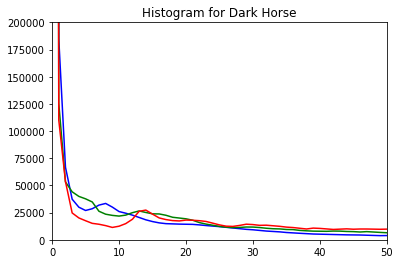

In [10]:
# to check all color channels for bricks image
img = horse
color = ('b','g','r')

#function to plot all color channels
for i,col in enumerate(color):
  histr = cv2.calcHist([img],[i],None,[256],[0,256])
  plt.plot(histr,color=col)
  plt.xlim([0,50])
  plt.ylim([0,200000])

plt.title('Histogram for Dark Horse')

Actually after changing limits, it is seen that all the three color channels are near zero pixel better for red channel but all hosuld be near to zero as it is a dark image.

##### Histogram for ROI (Masked section)

#### Histogram Equalization

It is a method of contrast adjustment based on image's histogram

<b> Let us see this example: </b>

![alt text](https://drive.google.com/uc?id=1NO7O1regOvGVG6SjSJ7m2S2fGE2IuWf3)

- Fist image is the color pizels of the image which is given in second iamge.
- It is seen neither we have pure white (255) or pure black(0) pixel
- Last iamge is histogram distribution of pixels.

We will apply <b> Histogram Equalization </b> which will reduce color depth i.e. reducing the shades of gray

- min - 52, max - 154. works for cumulative distribution function
- So min value --> 0 and max value --> 255 (contrast change)
- Other values are also equalized.

<b> Results on normal image </b>

![alt text](https://drive.google.com/uc?id=1O-rdLdUVNoVpxAZSNldjJePa7x9zyKEU)

 - First image is image udner test
 - Seond image ther is a histogram (red) and cumulative histogram (black line)
 - This is an example of <b> low contrast image </b>

<i> But if we apply histogram equalization then: </i>

![alt text](https://drive.google.com/uc?id=1GU5b_qiipufSMw7LhYb464R2SFN-IcG5)

- Histogram is well distributed after equalization (flattened out) and also cummulative histogram is a linear step function.
- This is an example of <b> high contrast image </b>




In [11]:
#Original form for OpenCV
rainbow = cv2.imread('rainbow.jpg')
#Converted to RGB for show
rainbow_c = cv2.cvtColor(rainbow,cv2.COLOR_BGR2RGB)

In [12]:
img = rainbow
img.shape # 3 color channel

(550, 413, 3)

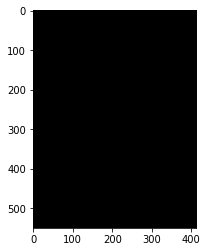

In [13]:
mask = np.zeros(img.shape[:2],np.uint8) #on 2D plane and then masked on all three color channels
plt.imshow(mask,cmap='gray') #pure black now

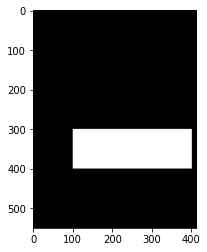

In [14]:
mask[300:400,100:400] = 255
plt.imshow(mask,cmap='gray')

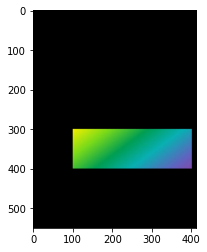

In [15]:
#using bitwise to filter through white space the original rainbow picture

masked_img = cv2.bitwise_and(img,img,mask=mask) # for histogram
show_masked_img = cv2.bitwise_and(rainbow_c,rainbow_c,mask=mask) #to show

plt.imshow(show_masked_img)

In [16]:
hist_mask_values_red = cv2.calcHist([rainbow],channels=[2],
                                    mask=mask,histSize=[256],ranges=[0,256])
hist_values_red = cv2.calcHist([rainbow],channels=[2],
                                    mask=None,histSize=[256],ranges=[0,256])

Text(0.5, 1.0, 'Red hsitogram for masked window')

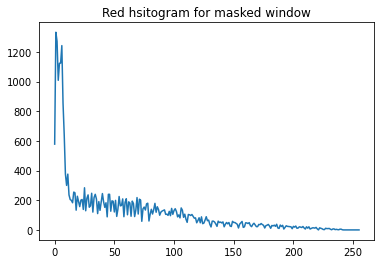

In [17]:
plt.plot(hist_mask_values_red)
plt.title('Red hsitogram for masked window')

It is seen mostly values are near to zero (less red) - darker and less and less as we see pure red.

Text(0.5, 1.0, 'Red hsitogram for non-masked window')

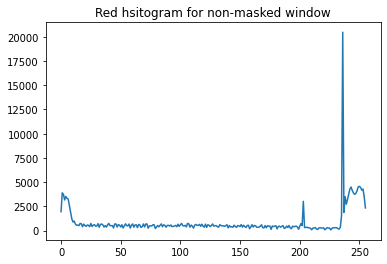

In [18]:
plt.plot(hist_values_red)
plt.title('Red hsitogram for non-masked window')

Here we see we have a lot of red color in non-masked rainbow image (just opposite to masked image)


---



---





In [19]:
#importing a new image 'gorilla.jpg'

#First we analyze in black and white

gorilla = cv2.imread('gorilla.jpg',0)

#DISPLAY IMAGE function
def display_img(img,cmap=None):
  fig = plt.figure(figsize=(10,8))
  ax = fig.add_subplot(111)
  ax.imshow(img,cmap='gray')

gorilla.shape

(1295, 1955)

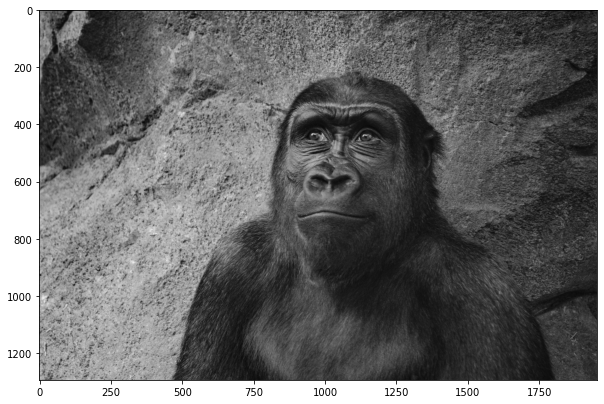

In [20]:
display_img(gorilla,cmap='gray')

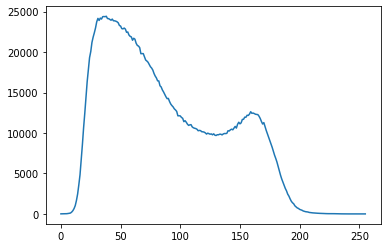

In [21]:
#histogram

hist_values = cv2.calcHist([gorilla],channels=[0],mask=None,histSize=[256],ranges=[0,256])
plt.plot(hist_values) # big near white color around the rock (in light gray)

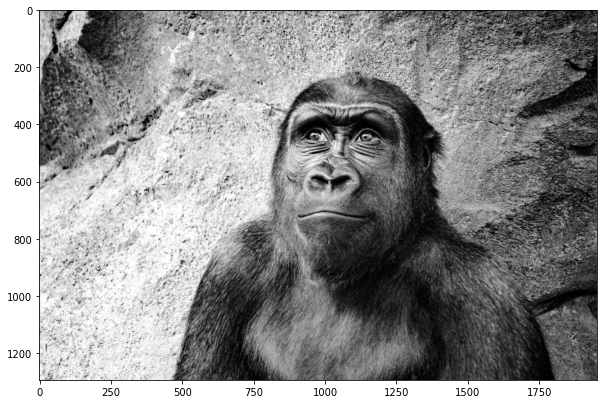

In [22]:
eq_gorilla = cv2.equalizeHist(gorilla)
display_img(eq_gorilla,cmap='gray') #more contrast

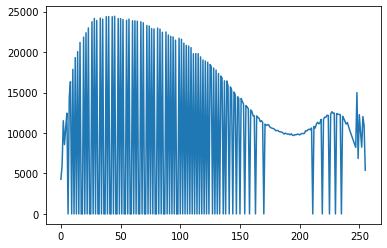

In [23]:
hist_values = cv2.calcHist([eq_gorilla],channels=[0],mask=None,histSize=[256],ranges=[0,256])
plt.plot(hist_values) #contant spikes as there are more 0 now.and decrease is also much shallower

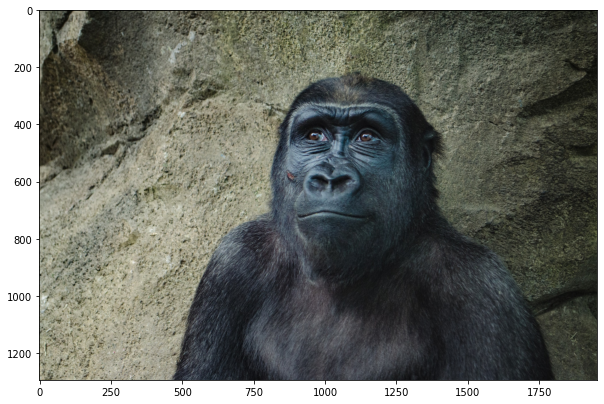

In [24]:
#COLOR IMAGE

color_gorilla = cv2.imread('gorilla.jpg')
show_gorilla = cv2.cvtColor(color_gorilla,cv2.COLOR_BGR2RGB)
display_img(show_gorilla)

In [25]:
# to use equalizer on color iamge, we need to first convert the image to HSV format as how the contrast works with HSV

hsv = cv2.cvtColor(color_gorilla,cv2.COLOR_BGR2HSV)

# HSV = hue (0), saturation (1), and value (2)
hsv[:,:,2].max()

255

In [26]:
#use equalizer
hsv[:,:,2] = cv2.equalizeHist(hsv[:,:,2])

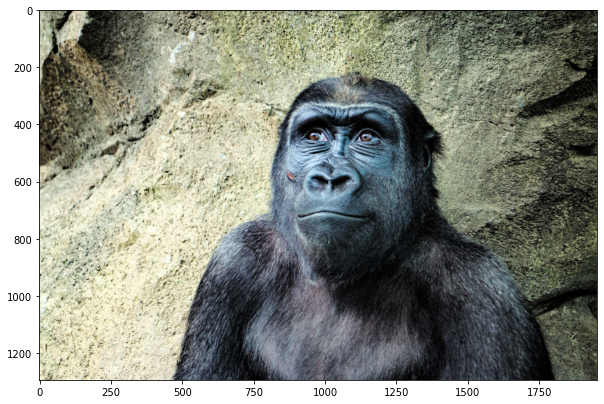

In [27]:
eq_color_gorilla = cv2.cvtColor(hsv,cv2.COLOR_HSV2RGB)
display_img(eq_color_gorilla)